In [22]:
import nltk
import string
from nltk.corpus import stopwords,wordnet
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import nltk
import re
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
# technology, food, books, etc.).
# 1. Convert text to lowercase and remove punctuaƟon.
# 2. Tokenize the text into words and sentences.
# 3. Remove stopwords (using NLTK's stopwords list).
# 4. Display word frequency distribuƟon (excluding stopwords)

In [6]:
paragraph = """
Technology fascinates me because it constantly evolves and transforms the way we live. 
From smartphones to artificial intelligence, innovation is reshaping communication, work, and even creativity. 
I enjoy learning about new gadgets, software, and breakthroughs in science. 
Technology also opens doors to solving global challenges like climate change and healthcare. 
The pace at which it grows keeps me curious and inspired every day.
"""

In [7]:
lower_nopunct = paragraph.lower().translate(str.maketrans('', '', string.punctuation))

In [12]:
sentences = sent_tokenize(lower_nopunct)
words = word_tokenize(lower_nopunct)

print("Tokenized Sentences:\n", sentences)
print("\nTokenized Words:\n", words)

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

print("\nFiltered Words (Stopwords Removed):\n", filtered_words)

Tokenized Sentences:
 ['\ntechnology fascinates me because it constantly evolves and transforms the way we live \nfrom smartphones to artificial intelligence innovation is reshaping communication work and even creativity \ni enjoy learning about new gadgets software and breakthroughs in science \ntechnology also opens doors to solving global challenges like climate change and healthcare \nthe pace at which it grows keeps me curious and inspired every day']

Tokenized Words:
 ['technology', 'fascinates', 'me', 'because', 'it', 'constantly', 'evolves', 'and', 'transforms', 'the', 'way', 'we', 'live', 'from', 'smartphones', 'to', 'artificial', 'intelligence', 'innovation', 'is', 'reshaping', 'communication', 'work', 'and', 'even', 'creativity', 'i', 'enjoy', 'learning', 'about', 'new', 'gadgets', 'software', 'and', 'breakthroughs', 'in', 'science', 'technology', 'also', 'opens', 'doors', 'to', 'solving', 'global', 'challenges', 'like', 'climate', 'change', 'and', 'healthcare', 'the', 'pac

In [13]:
fdist = FreqDist(filtered_words)

In [14]:
print("\nTop 10 Most Common Words:")
for word, freq in fdist.most_common(10):
    print(f"{word}: {freq}")



Top 10 Most Common Words:
technology: 2
fascinates: 1
constantly: 1
evolves: 1
transforms: 1
way: 1
live: 1
smartphones: 1
artificial: 1
intelligence: 1


<Axes: title={'center': 'Top 10 Word Frequencies (Excluding Stopwords)'}, xlabel='Samples', ylabel='Counts'>

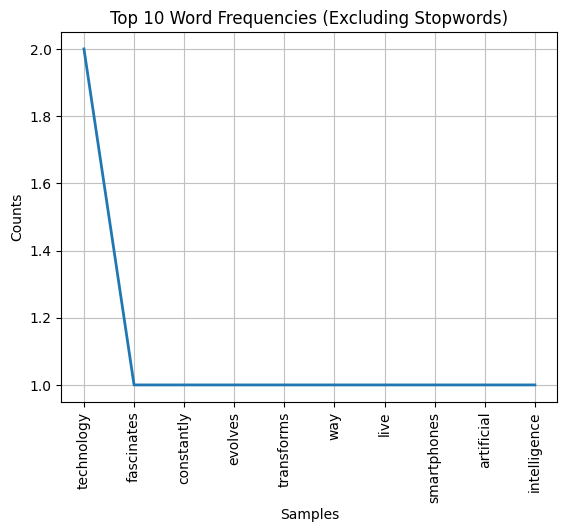

In [15]:
# Plot
fdist.plot(10, title="Top 10 Word Frequencies (Excluding Stopwords)")

In [ ]:
# Q2: Stemming and LemmaƟzaƟon
# 1. Take the tokenized words from QuesƟon 1 (aŌer stopword removal).
# 2. Apply stemming using NLTK's PorterStemmer and LancasterStemmer.
# 3. Apply lemmaƟzaƟon using NLTK's WordNetLemmaƟzer.
# 4. Compare and display results of both techniques. 

In [17]:
text = paragraph.lower().translate(str.maketrans('', '', string.punctuation))
words = word_tokenize(text)
filtered_words = [word for word in words if word not in stopwords.words('english')]

In [20]:
porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()


In [21]:
print(f"{'Original':<15}{'Porter Stem':<15}{'Lancaster Stem':<20}{'Lemmatized':<15}")
print("-" * 65)
for word in filtered_words:
    print(f"{word:<15}{porter.stem(word):<15}{lancaster.stem(word):<20}{lemmatizer.lemmatize(word):<15}")

Original       Porter Stem    Lancaster Stem      Lemmatized     
-----------------------------------------------------------------
technology     technolog      technolog           technology     
fascinates     fascin         fascin              fascinates     
constantly     constantli     const               constantly     
evolves        evolv          evolv               evolves        
transforms     transform      transform           transforms     
way            way            way                 way            
live           live           liv                 live           
smartphones    smartphon      smartphon           smartphones    
artificial     artifici       art                 artificial     
intelligence   intellig       intellig            intelligence   
innovation     innov          innov               innovation     
reshaping      reshap         reshap              reshaping      
communication  commun         commun              communication  
work      

In [ ]:
# Q3. Regular Expressions and Text Spliƫng
# 1. Take their original text from Question 1.
# 2. Use regular expressions to:
# a. Extract all words with more than 5 leƩers.
# b. Extract all numbers (if any exist in their text).
# c. Extract all capitalized words.
# 3. Use text spliƫng techniques to:
# a. Split the text into words containing only alphabets (removing digits and special
# characters).
# b. Extract words starƟng with a vowel.


In [25]:
words_more_than_5 = re.findall(r'\b[a-zA-Z]{6,}\b', paragraph)
print("Words with more than 5 letters:\n", words_more_than_5)

Words with more than 5 letters:
 ['Technology', 'fascinates', 'because', 'constantly', 'evolves', 'transforms', 'smartphones', 'artificial', 'intelligence', 'innovation', 'reshaping', 'communication', 'creativity', 'learning', 'gadgets', 'software', 'breakthroughs', 'science', 'Technology', 'solving', 'global', 'challenges', 'climate', 'change', 'healthcare', 'curious', 'inspired']


In [26]:
numbers = re.findall(r'\b\d+\b', paragraph)
print("\nNumbers in text:\n", numbers if numbers else "No numbers found.")


Numbers in text:
 No numbers found.


In [27]:
capitalized_words = re.findall(r'\b[A-Z][a-z]*\b', paragraph)
print("\nCapitalized words:\n", capitalized_words)


Capitalized words:
 ['Technology', 'From', 'I', 'Technology', 'The']


In [28]:
alphabetic_words = re.findall(r'\b[a-zA-Z]+\b', paragraph)
print("\nAlphabetic words:\n", alphabetic_words)


Alphabetic words:
 ['Technology', 'fascinates', 'me', 'because', 'it', 'constantly', 'evolves', 'and', 'transforms', 'the', 'way', 'we', 'live', 'From', 'smartphones', 'to', 'artificial', 'intelligence', 'innovation', 'is', 'reshaping', 'communication', 'work', 'and', 'even', 'creativity', 'I', 'enjoy', 'learning', 'about', 'new', 'gadgets', 'software', 'and', 'breakthroughs', 'in', 'science', 'Technology', 'also', 'opens', 'doors', 'to', 'solving', 'global', 'challenges', 'like', 'climate', 'change', 'and', 'healthcare', 'The', 'pace', 'at', 'which', 'it', 'grows', 'keeps', 'me', 'curious', 'and', 'inspired', 'every', 'day']


In [29]:
vowel_words = re.findall(r'\b[aeiouAEIOU][a-zA-Z]*\b', paragraph)
print("\nWords starting with a vowel:\n", vowel_words)


Words starting with a vowel:
 ['it', 'evolves', 'and', 'artificial', 'intelligence', 'innovation', 'is', 'and', 'even', 'I', 'enjoy', 'about', 'and', 'in', 'also', 'opens', 'and', 'at', 'it', 'and', 'inspired', 'every']


In [ ]:
# Q4. Custom TokenizaƟon & Regex-based Text Cleaning
# 1. Take original text from QuesƟon 1.
# 2. Write a custom tokenizaƟon funcƟon that:
# a. Removes punctuaƟon and special symbols, but keeps contracƟons (e.g.,
# "isn't" should not be split into "is" and "n't").
# b. Handles hyphenated words as a single token (e.g., "state-of-the-art" remains
# a single token).
# c. Tokenizes numbers separately but keeps decimal numbers intact (e.g., "3.14"
# should remain as is).
# 3. Use Regex SubsƟtuƟons (re.sub) to:
# a. Replace email addresses with '<EMAIL>' placeholder.
# b. Replace URLs with '<URL>' placeholder.
# c. Replace phone numbers (formats: 123-456-7890 or +91 9876543210) with
# '<PHONE>' placeholder. 

In [31]:
# Custom Tokenization Function

def custom_tokenizer(text):
    # Keep contractions and hyphenated words
    pattern = r"""
        \b(?:\d+\.\d+|\d+)\b                    # Decimal or integer numbers
        | \b\w+(?:-\w+)*\b                      # Words, possibly hyphenated
        | \b\w+'\w+\b                           # Contractions like isn't, don't
    """
    tokens = re.findall(pattern, text, re.VERBOSE)
    return tokens

In [32]:
# Regex-based Text Cleaning

def clean_text(text):
    # Replace email addresses
    text = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', '<EMAIL>', text)

    # Replace URLs
    text = re.sub(r'https?://\S+|www\.\S+', '<URL>', text)

    # Replace phone numbers (international or local)
    text = re.sub(r'(\+?\d{1,3}[\s-])?\d{3}[-\s]?\d{3}[-\s]?\d{4}', '<PHONE>', text)

    return text

In [33]:
cleaned_paragraph = clean_text(paragraph)
tokens = custom_tokenizer(cleaned_paragraph)

In [34]:
print("Cleaned Text:\n", cleaned_paragraph)
print("\nCustom Tokens:\n", tokens)

Cleaned Text:
 
Technology fascinates me because it constantly evolves and transforms the way we live. 
From smartphones to artificial intelligence, innovation is reshaping communication, work, and even creativity. 
I enjoy learning about new gadgets, software, and breakthroughs in science. 
Technology also opens doors to solving global challenges like climate change and healthcare. 
The pace at which it grows keeps me curious and inspired every day.


Custom Tokens:
 ['Technology', 'fascinates', 'me', 'because', 'it', 'constantly', 'evolves', 'and', 'transforms', 'the', 'way', 'we', 'live', 'From', 'smartphones', 'to', 'artificial', 'intelligence', 'innovation', 'is', 'reshaping', 'communication', 'work', 'and', 'even', 'creativity', 'I', 'enjoy', 'learning', 'about', 'new', 'gadgets', 'software', 'and', 'breakthroughs', 'in', 'science', 'Technology', 'also', 'opens', 'doors', 'to', 'solving', 'global', 'challenges', 'like', 'climate', 'change', 'and', 'healthcare', 'The', 'pace', 'at